# CLASSIFICATION OF CONCERIOUS TUMORS WITH DNN

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preporcessing

##Importing Libraries

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

##Importing dataset

In [15]:
df=pd.read_excel('/content/drive/My Drive/X.xlsx',  error_bad_lines=False)
df.head(5)

,Hugo_Symbol,Gene_Id,Center,Chromosome,Start_Position,End_Position,Reference_Allele,t_depth,t_ref_count,t_alt_count,n_depth,ALLELE_NUM,TRANSCRIPT_STRAND,Variant_Type,Reference_Allele.1,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth.1,t_ref_count.1,t_alt_count.1,n_depth.1,all_effects,Allele,Gene,Feature,Feature_type,One_Consequence,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM.1,TRANSCRIPT_STRAND.1,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE,CANONICAL,IMPACT,PICK,VARIANT_CLASS,TSL,Variant_Classification
0,EXOSC10,5394,BI,chr1,11080633,11080633,A,42,34,8,38,1,-1.0,SNP,A,A,G,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.1587-84T>C,p.Val395Leu,NaN,ENST00000376936,NaN,42,34,8,38,"EXOSC10,intron_variant,,ENST00000376936,NM_001...",G,ENSG00000171824,ENST00000376936,Transcript,intron_variant,intron_variant,-/2808,-/2658,-/885,NaN,NaN,1,-1.0,EXOSC10,HGNC,HGNC:9138,protein_coding,YES,MODIFIER,1.0,SNV,1.0,Intron
1,LRRC8C,84230,BI,chr1,89713753,89713753,G,66,56,10,90,1,1.0,SNP,G,G,C,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.1183G>C,p.Val395Leu,p.V395L,ENST00000370454,2020-03-03 00:00:00,66,56,10,90,"LRRC8C,missense_variant,p.V395L,ENST0000037045...",C,ENSG00000171488,ENST00000370454,Transcript,missense_variant,missense_variant,1438/7218,1183/2412,395/803,V/L,Gtc/Ctc,1,1.0,LRRC8C,HGNC,HGNC:25075,protein_coding,YES,MODERATE,1.0,SNV,1.0,Missense_Mutation
2,HMCN1,83872,BI,chr1,186114925,186114925,C,155,121,34,188,1,1.0,SNP,C,C,T,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.11383C>T,p.Arg3795Ter,p.R3795*,ENST00000271588,74/107,155,121,34,188,"HMCN1,stop_gained,p.R3795*,ENST00000271588,NM_...",T,ENSG00000143341,ENST00000271588,Transcript,stop_gained,stop_gained,11612/18208,11383/16908,3795/5635,R/*,Cga/Tga,1,1.0,HMCN1,HGNC,HGNC:19194,protein_coding,YES,HIGH,1.0,SNV,1.0,Nonsense_Mutation
3,PLA2G4A,5321,BI,chr1,186893146,186893146,A,152,127,25,182,1,1.0,SNP,A,A,C,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.251A>C,p.Glu84Ala,p.E84A,ENST00000367466,2018-04-01 00:00:00,152,127,25,182,"PLA2G4A,missense_variant,p.E84A,ENST0000036746...",C,ENSG00000116711,ENST00000367466,Transcript,missense_variant,missense_variant,403/2875,251/2250,84/749,E/A,gAa/gCa,1,1.0,PLA2G4A,HGNC,HGNC:9035,protein_coding,YES,MODERATE,1.0,SNV,1.0,Missense_Mutation
4,OTOF,9381,BI,chr2,26476904,26476904,G,50,42,8,60,1,-1.0,SNP,G,G,A,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.2663C>T,p.Thr888Met,p.T888M,ENST00000272371,22/47,50,42,8,60,"OTOF,missense_variant,p.T888M,ENST00000272371,...",A,ENSG00000115155,ENST00000272371,Transcript,missense_variant,missense_variant,2790/7156,2663/5994,888/1997,T/M,aCg/aTg,1,-1.0,OTOF,HGNC,HGNC:8515,protein_coding,YES,MODERATE,1.0,SNV,1.0,Missense_Mutation


##Size of data

In [16]:
df.shape 

(118824, 55)

##Columns display

In [17]:
print(df.columns)

Index(['Hugo_Symbol', 'Gene_Id', 'Center', 'Chromosome', 'Start_Position',
       'End_Position', 'Reference_Allele', 't_depth', 't_ref_count',
       't_alt_count', 'n_depth', 'ALLELE_NUM', 'TRANSCRIPT_STRAND',
       'Variant_Type', 'Reference_Allele.1', 'Tumor_Seq_Allele1',
       'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Sequencer', 'Tumor_Sample_UUID',
       'Matched_Norm_Sample_UUID', 'HGVSc', 'HGVSp', 'HGVSp_Short',
       'Transcript_ID', 'Exon_Number', 't_depth.1', 't_ref_count.1',
       't_alt_count.1', 'n_depth.1', 'all_effects', 'Allele', 'Gene',
       'Feature', 'Feature_type', 'One_Consequence', 'Consequence',
       'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids',
       'Codons', 'ALLELE_NUM.1', 'TRANSCRIPT_STRAND.1', 'SYMBOL',
       'SYMBOL_SOURCE', 'HGNC_ID', 'BIOTYPE', 'CANONICAL', 'IMPACT', 'PICK',
       'VARIANT_CLASS', 'TSL', 'Variant_Classification'],
      dtype='object')


##Size of columns

In [18]:
len(df.columns)

55

##Types columns

In [19]:
df.dtypes

Hugo_Symbol                     object
Gene_Id                          int64
Center                          object
Chromosome                      object
Start_Position                   int64
End_Position                     int64
Reference_Allele                object
t_depth                          int64
t_ref_count                      int64
t_alt_count                      int64
n_depth                          int64
ALLELE_NUM                       int64
TRANSCRIPT_STRAND              float64
Variant_Type                    object
Reference_Allele.1              object
Tumor_Seq_Allele1               object
Tumor_Seq_Allele2               object
Tumor_Sample_Barcode            object
Matched_Norm_Sample_Barcode     object
Sequencer                       object
Tumor_Sample_UUID               object
Matched_Norm_Sample_UUID        object
HGVSc                           object
HGVSp                           object
HGVSp_Short                     object
Transcript_ID            

###We can count the number of values ​​in each category

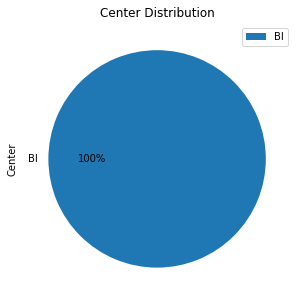

In [20]:
df['Center'].value_counts(dropna=False).plot.pie(y='Center', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Center Distribution')

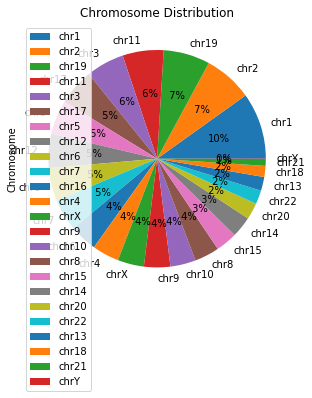

In [21]:
df['Chromosome'].value_counts(dropna=False).plot.pie(y='Chromosome', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Chromosome Distribution')

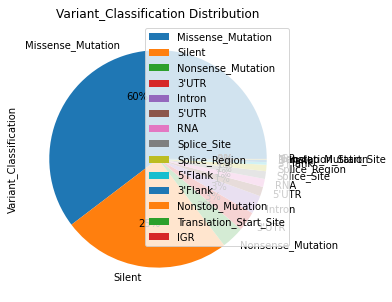

In [22]:
df['Variant_Classification'].value_counts(dropna=False).plot.pie(y='Variant_Classification', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Variant_Classification Distribution')

In [23]:
import seaborn as sns
sns.set_style('whitegrid')

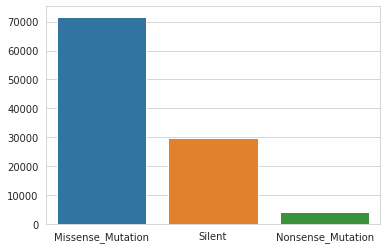

In [24]:
Missense_Mutation= len(df['Variant_Classification'][df['Variant_Classification']=='Missense_Mutation'])
Silent= len(df['Variant_Classification'][df['Variant_Classification']=='Silent'])
Nonsense_Mutation=len(df['Variant_Classification'][df['Variant_Classification']=='Nonsense_Mutation'])


sns.barplot(x = ['Missense_Mutation', 'Silent', 'Nonsense_Mutation'],
            y = [Missense_Mutation,Silent,Nonsense_Mutation ],
            )

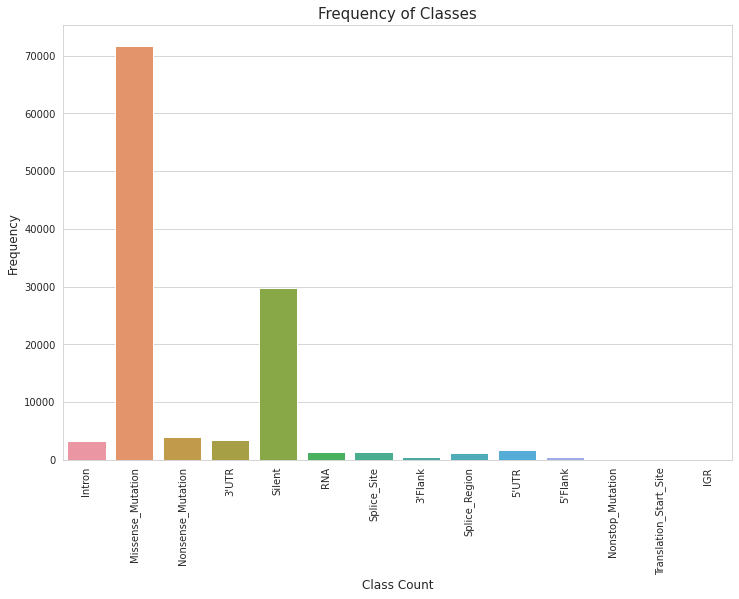

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x="Variant_Classification", data=df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

##Describtion target

In [26]:
detail = df['Variant_Classification'].describe()
print(detail)

count                118824
unique                   14
top       Missense_Mutation
freq                  71706
Name: Variant_Classification, dtype: object


In [27]:
obj_df = df.select_dtypes(include=['object']).copy()

#Data Preparation

In [28]:
obj_df.head()
obj_df[obj_df.isnull().any(axis=1)]

,Hugo_Symbol,Center,Chromosome,Reference_Allele,Variant_Type,Reference_Allele.1,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,all_effects,Allele,Gene,Feature,Feature_type,One_Consequence,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE,CANONICAL,IMPACT,VARIANT_CLASS,Variant_Classification
0,EXOSC10,BI,chr1,A,SNP,A,A,G,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.1587-84T>C,p.Val395Leu,NaN,ENST00000376936,NaN,"EXOSC10,intron_variant,,ENST00000376936,NM_001...",G,ENSG00000171824,ENST00000376936,Transcript,intron_variant,intron_variant,-/2808,-/2658,-/885,NaN,NaN,EXOSC10,HGNC,HGNC:9138,protein_coding,YES,MODIFIER,SNV,Intron
6,DLX2,BI,chr2,C,SNP,C,C,G,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.*33G>C,p.Pro130Ser,NaN,ENST00000234198,2020-03-03 00:00:00,"DLX2,3_prime_UTR_variant,,ENST00000234198,NM_0...",G,ENSG00000115844,ENST00000234198,Transcript,3_prime_UTR_variant,3_prime_UTR_variant,1382/2453,-/987,-/328,NaN,NaN,DLX2,HGNC,HGNC:2915,protein_coding,YES,MODIFIER,SNV,3'UTR
9,GCSAM,BI,chr3,T,SNP,T,T,C,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.190A>G,p.Asn64Asp,p.N64D,ENST00000308910,2020-06-04 00:00:00,"GCSAM,missense_variant,p.N64D,ENST00000308910,...",C,ENSG00000174500,ENST00000308910,Transcript,missense_variant,missense_variant;splice_region_variant,375/3336,190/537,64/178,N/D,Aat/Gat,GCSAM,HGNC,HGNC:20253,protein_coding,NaN,MODERATE,SNV,Missense_Mutation
12,RGS12,BI,chr4,C,SNP,C,C,G,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.4145C>G,p.Pro1382Arg,p.P1382R,ENST00000336727,17/17,"RGS12,missense_variant,p.P1382R,ENST0000034473...",G,ENSG00000159788,ENST00000336727,Transcript,missense_variant,missense_variant,4248/4674,4145/4344,1382/1447,P/R,cCa/cGa,RGS12,HGNC,HGNC:9994,protein_coding,NaN,MODERATE,SNV,Missense_Mutation
15,TBRG4,BI,chr7,A,SNP,A,A,C,TCGA-SW-A7EB-01A-11D-A34U-08,TCGA-SW-A7EB-10A-01D-A34X-08,Illumina HiSeq 2000,abe30688-9765-4e24-8b7d-3c04543b2441,f721f0b9-2b21-44d1-8b54-5385fbd52958,c.412-77T>G,p.Asp36His,NaN,ENST00000258770,NaN,"TBRG4,intron_variant,,ENST00000258770,NM_00474...",C,ENSG00000136270,ENST00000258770,Transcript,intron_variant,intron_variant,-/2243,-/1896,-/631,NaN,NaN,TBRG4,HGNC,HGNC:17443,protein_coding,YES,MODIFIER,SNV,Intron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118801,POLN,BI,chr4,C,SNP,C,C,A,TCGA-IN-AB1V-01A-21D-A410-08,TCGA-IN-AB1V-10A-01D-A413-08,Illumina HiSeq 2000,e9d53789-cc98-4016-92e3-e752dc6cd891,de7daf62-f9a3-46c3-9ef1-4ffa1578268c,c.1386G>T,p.Lys462Asn,p.K462N,ENST00000382865,2024-10-01 00:00:00,"POLN,missense_variant,p.K462N,ENST00000511885,...",A,ENSG00000130997,ENST00000382865,Transcript,missense_variant,missense_variant,1386/2899,1386/2703,462/900,K/N,aaG/aaT,POLN,HGNC,HGNC:18870,protein_coding,NaN,MODERATE,SNV,Missense_Mutation
118804,OCIAD1,BI,chr4,T,SNP,T,T,C,TCGA-IN-AB1V-01A-21D-A410-08,TCGA-IN-AB1V-10A-01D-A413-08,Illumina HiSeq 2000,e9d53789-cc98-4016-92e3-e752dc6cd891,de7daf62-f9a3-46c3-9ef1-4ffa1578268c,c.264T>C,p.=,p.F88F,ENST00000264312,2020-09-06 00:00:00,"OCIAD1,synonymous_variant,p.F88F,ENST000004255...",C,ENSG00000109180,ENST00000264312,Transcript,synonymous_variant,synonymous_variant,454/1414,264/738,88/245,F,ttT/ttC,OCIAD1,HGNC,HGNC:16074,protein_coding,NaN,LOW,SNV,Silent
118810,ATP6V0D2,BI,chr8,G,SNP,G,G,A,TCGA-IN-AB1V-

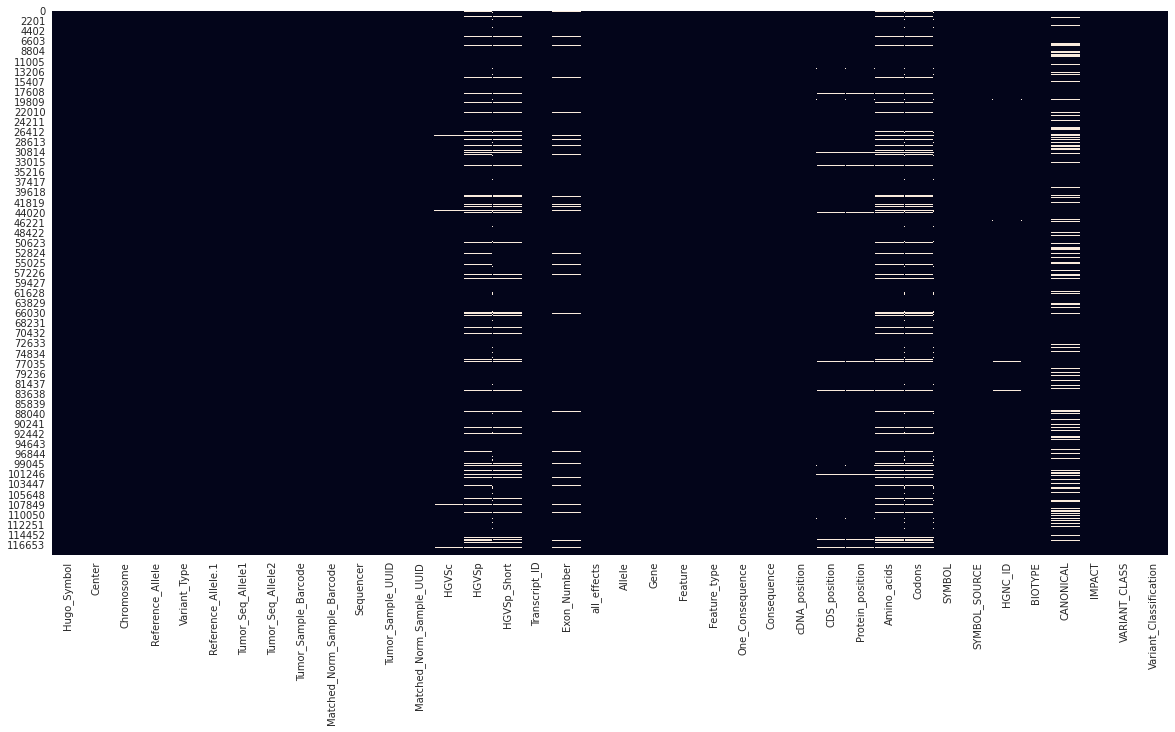

In [29]:
# Si on affiche le tableau avec le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(obj_df.isna(), cbar=False)

##Categorical data

In [30]:
a=['Hugo_Symbol', 'Center', 'Chromosome', 'Reference_Allele',
        'Variant_Type', 'Reference_Allele.1',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Sequencer', 'Tumor_Sample_UUID',
       'Matched_Norm_Sample_UUID', 'HGVSc', 'HGVSp', 'HGVSp_Short',
       'Transcript_ID', 'Exon_Number', 'all_effects', 'Allele', 'Gene',
       'Feature', 'Feature_type', 'One_Consequence', 'Consequence',
       'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids',
       'Codons',  'SYMBOL',
       'SYMBOL_SOURCE', 'HGNC_ID', 'BIOTYPE', 'CANONICAL', 'IMPACT', 'VARIANT_CLASS']
for i in a:
    obj_df[i] = obj_df[i].astype('category')
    obj_df[i] = obj_df[i].cat.codes
    df[i]=obj_df[i]


##Replace NaN values with average of columns

In [31]:
df=df.fillna(df.mean())

In [32]:


target_names = df['Variant_Classification'].unique()
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict
y= df['Variant_Classification'].map(target_dict)
from keras.utils.np_utils import to_categorical
y = to_categorical(y)
X = df.iloc[:,:-1].values


##Splitting the dataset into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(95059, 54)

#Feature scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Modeling

##Make DNN


###Initialize our DNN

In [35]:
 model = Sequential()

##Hidden layer and Input layer

In [36]:
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(1024,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(1024,activation="relu"))

model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))

model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))

model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))

model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))

model.add(Dense(32,activation="relu"))

##Output Layer

In [37]:
model.add(Dense(14, activation='softmax')) #for 14 output 0-13

##Compile our DNN

In [38]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

##Fitting the DNN to the train set

In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [52]:
history=model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.0701 - accuracy: 0.9848
Epoch 2/100
9506/9506 [==============================] - 37s 4ms/step - loss: 0.0907 - accuracy: 0.9797
Epoch 3/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.0841 - accuracy: 0.9737
Epoch 4/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.0859 - accuracy: 0.9869
Epoch 5/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.0556 - accuracy: 0.9862
Epoch 6/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.1874 - accuracy: 0.9878
Epoch 7/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.0550 - accuracy: 0.9908
Epoch 8/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.0506 - accuracy: 0.9932
Epoch 9/100
9506/9506 [==============================] - 36s 4ms/step - loss: 0.0574 - accuracy: 0.9885
Epoch 10/100
9506/9506 [==============================] - 36s 4m

##Visualize Neural Network Loss History

#### Get training and test loss histories

In [55]:
training_loss = history.history['loss']

##Create count of the number of epochs

In [56]:
epoch_count = range(1, len(training_loss) + 1)

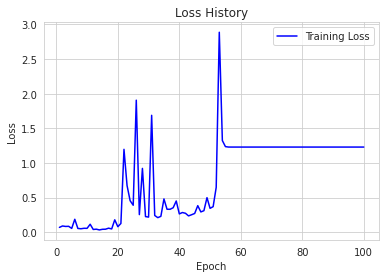

In [57]:
## Visualize Neural Network Loss History
plt.plot(epoch_count, training_loss, 'b-')
plt.title('Loss History')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

##Visualize Neural Network Accuracy History

###Get training and test loss histories

In [58]:
training_accuracy = history.history['accuracy']

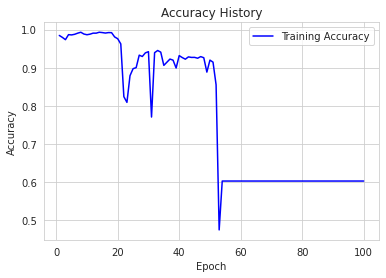

In [59]:
##Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.title('Accuracy History')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

##Prediction test data

In [60]:
y_pred=model.predict(X_test)
pred=np.argmax(y_pred,axis=1)
test=np.argmax(y_test,axis=1)

##Confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(pred,test)
cm 

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [  623, 14385,   813,   683,  5972,   254,   278,    81,   228,
          348,    81,    10,     8,     1],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
         